In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_palette('deep', desat=0.6)
sns.set_context(rc={'figure.figsize': (8,4)})

train_json = pd.read_json('F:/Kaggle/Twitter_Trolls/Trolls.json', lines=True)

In [3]:
annotation = train_json.annotation.apply(pd.Series)

train_json["notes"] = annotation.notes
train_json["label"] = annotation.label
train_json["label"] = pd.DataFrame(train_json.label.values.tolist())

train_json = train_json.drop(["annotation","extras","notes"],axis=1)
train_json.head()

,content,label
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1


<h2> Basic EDA </h2>

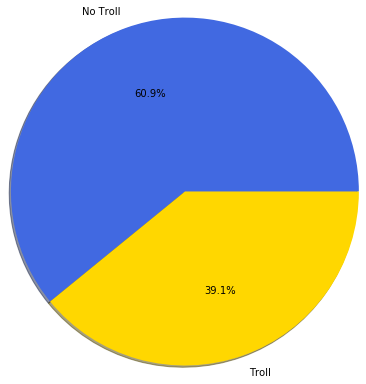

In [13]:
values = [train_json.label.value_counts()[0], train_json.label.value_counts()[1]]
labels = ['No Troll', 'Troll']
colors = ['royalblue', 'gold']
#explode = (0, 0.15)

plt.axis('equal')
plt.pie(x=values, labels=labels, colors=colors, radius=2, shadow=True,autopct='%1.1f%%');

<h1> LIWK Analysis </h1>

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

troll_true = pd.read_csv('F:/Kaggle/Twitter_Trolls/csv/LIWC2015_troll_true.csv')
troll_false = pd.read_csv('F:/Kaggle/Twitter_Trolls/csv/LIWC2015_troll_false.csv')

In [3]:
troll_true["label"] = 1
troll_false["label"] = 0

data = troll_true.append(troll_false)
data = data.drop(["Source (A)", "Source (B)"], axis=1)

In [19]:
data.head(5)

,WC,Analytic,Clout,Authentic,Tone,WPS,Sixltr,Dic,function,pronoun,...,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,label
0,4,92.84,50.00,1.00,1.00,4.00,25.00,75.00,0.00,0.00,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,1
1,24,26.80,66.17,1.00,25.77,12.00,12.50,83.33,54.17,16.67,...,0.0,0.0,0.00,0.0,0.0,0.0,4.17,0.0,0.0,1
2,30,3.09,84.14,43.37,1.03,7.50,3.33,93.33,70.00,26.67,...,0.0,0.0,0.00,0.0,0.0,0.0,3.33,0.0,0.0,1
3,21,40.66,17.04,89.63,1.00,5.25,19.05,95.24,42.86,19.05,...,0.0,0.0,4.76,0.0,0.0,0.0,0.00,0.0,0.0,1
4,15,1.00,74.76,1.00,25.77,7.50,6.67,93.33,60.00,20.00,...,0.0,0.0,6.67,0.0,0.0,0.0,6.67,0.0,0.0,1


In [146]:
((data[list(data)]==0).sum().sort_values(ascending=True)/data.i.value_counts().sum())

WC              0.001100
Analytic        0.001100
Clout           0.001100
Authentic       0.001100
Tone            0.001100
WPS             0.001100
Dic             0.013549
function        0.080896
AllPunc         0.108545
pronoun         0.160042
verb            0.166242
affect          0.205090
focuspresent    0.219889
ppron           0.245538
informal        0.287036
Sixltr          0.327684
social          0.342833
auxverb         0.349483
negemo          0.373281
cogproc         0.375581
relativ         0.394680
prep            0.417379
Period          0.440078
anger           0.471226
swear           0.494475
ipron           0.503975
i               0.511274
drives          0.535973
adverb          0.538223
posemo          0.547373
                  ...   
achieve         0.879606
work            0.880006
male            0.888856
see             0.893905
assent          0.898755
hear            0.907055
health          0.913504
ingest          0.913854
shehe           0.916204


<h2> Machine Learning </h2>

In [18]:
from sklearn.model_selection import train_test_split

#Splitting in Dependent and Independant Variables
X = data.drop(["label"], axis=1)
y = data["label"]
#, "sexual", "body", "swear", "cogproc", "anger", "negemo", "negate", "QMark", "Exclam", "Tone"
#Splitting into Train and Test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

<h3> SVM </h3>

In [152]:
from sklearn import svm

In [153]:
#Initialize and Train Model
clf = svm.SVC(gamma=0.001, C=100)
model = clf.fit(X_train, y_train)

In [154]:
#Accuracy using test set
model.score(X_test, y_test)

0.9338443592734544

In [155]:
#Confidence of Predicition from random Tweet
#model.predict_proba(X_test.loc[[5]])

<h3> Random Forest </h3>

from sklearn.ensemble import RandomForestClassifier

In [17]:
clf = RandomForestClassifier(n_jobs=12, random_state=42)

model_rf = clf.fit(X_train, y_train)

NameError: name 'RandomForestClassifier' is not defined

In [133]:
model_rf.score(X_test, y_test)

<h2> Logistic Regression </h2>

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

<h3> Check For multicollinearity </h3>

In [139]:
'''corr = data.drop(["label"], axis=1).corr()
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap)
ax.xaxis.tick_top()
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()'''

'corr = data.drop(["label"], axis=1).corr()\nfig = plt.figure(figsize=(16,15))\nax = fig.add_subplot(111)\ncmap = sns.diverging_palette(220, 10, as_cmap=True)\nsns.heatmap(corr, \n           xticklabels=corr.columns.values,\n           yticklabels=corr.index.values,\n           cmap=cmap)\nax.xaxis.tick_top()\nplt.setp(ax.get_xticklabels(), rotation=90)\nplt.show()'

<h3> Run Regression </h3>

In [19]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

fpr, tpr, _ = metrics.roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
auc = metrics.auc(fpr, tpr)
auc

0.7526129921227648

In [20]:
log_reg.score(X_test, y_test)

0.6868855190801533

In [164]:
log_reg.predict_proba(X_test.loc[[5]])

array([[0.3959764, 0.6040236]])

In [21]:
d = {'var': list(X_train), 'impact': log_reg.coef_.ravel()}
var_impact = pd.DataFrame(data=d)
var_impact['positive'] = np.where(var_impact['impact']>0, True, False)
var_impact['impact'] = var_impact['impact'].abs()
var_strongest = var_impact.sort_values('abs', ascending=False).head(10).append(var_impact.sort_values('abs', ascending=True).head(10))
var_strongest = var_strongest.sort_values('impact', ascending=False)

KeyError: 'abs'

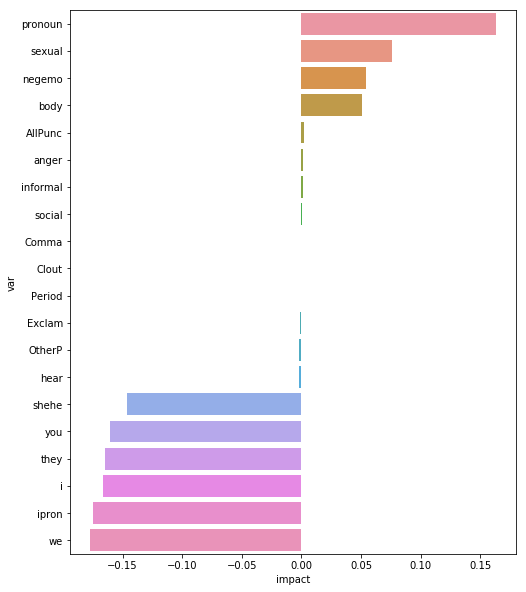

In [119]:
plt.figure(figsize=(8,10))
sns.barplot(var_strongest['impact'],var_strongest['var'])


In [161]:
log_reg.intercept_

array([-0.74122853])

<h1> Remove lowest</h1>

In [31]:
d = {'var': list(X_train), 'impact': log_reg.coef_.ravel()}
var_impact = pd.DataFrame(data=d)
var_impact['impact'] = var_impact['impact'].abs()
var_impact = var_impact.sort_values('impact',ascending=False)

In [47]:
var_impact.iloc[46]

impact    0.0114642
var         percept
Name: 47, dtype: object

In [51]:
data_drop = data.drop(var_impact[var_impact['impact']<0.0114642].var, axis=1)

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

In [53]:
var_impact[var_impact['impact']<0.0114642]impact

,impact,var
67,0.011422,space
39,0.011357,male
65,0.011211,relativ
79,0.010950,nonflu
21,0.010510,conj
20,0.009972,adverb
55,0.009439,ingest
89,0.009038,Quote
38,0.008963,female
28,0.006878,quant
